##Mario Yahir García Hernández
##Oscar Correa Saenz
##Ricardo Aguilar Hernández



---

# **Clasificación de Imágenes de Flores utilizando TensorFlow**

## 1. **Introducción**

En este trabajo se presenta el desarrollo de un modelo de clasificación de imágenes de flores utilizando el conjunto de datos `tf_flowers`, disponible en la librería de TensorFlow Datasets. El objetivo principal es diseñar y entrenar un modelo de aprendizaje profundo que permita identificar distintos tipos de flores a partir de imágenes. Se realizarán comparaciones de rendimiento con y sin ajuste fino (fine-tuning) utilizando un modelo preentrenado.

## 2. **Conjunto de Datos**

### 2.1. Descripción del Conjunto de Datos

El conjunto de datos utilizado en este proyecto es el `tf_flowers`, que contiene imágenes de cinco clases diferentes de flores. Está disponible a través de `tensorflow_datasets`.

- **Número total de imágenes**: X imágenes
- **Clases de flores**:
  - Daisy
  - Dandelion
  - Roses
  - Sunflowers
  - Tulips

```python
import tensorflow_datasets as tfds

# Cargar el conjunto de datos
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)
class_names = info.features['label'].names
print("Clases de flores:", class_names)
```

## 3. **Preprocesamiento de los Datos**

Se ha realizado un preprocesamiento de las imágenes, que incluye:
- **Redimensionamiento** de las imágenes a 128x128 píxeles.
- **Normalización** de los valores de los píxeles, escalando entre 0 y 1.

```python
def normalize_img(image, label):
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label
```

Se dividió el conjunto de datos en entrenamiento, validación y prueba:
- Conjunto de entrenamiento: 70%
- Conjunto de validación: 15%
- Conjunto de prueba: 15%

```python
train_dataset = dataset['train'].map(normalize_img).shuffle(1000).batch(32)
validation_dataset = dataset['train'].take(500).map(normalize_img).batch(32)
test_dataset = dataset['train'].skip(500).map(normalize_img).batch(32)
```

## 4. **Creación del Modelo**

Se ha implementado un modelo secuencial con capas convolucionales (`Conv2D`), seguido de capas de `MaxPooling2D` y una capa densa (`Dense`) con activación `softmax` para la clasificación en 5 clases.

### 4.1. Definición del Modelo

```python
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 clases de flores
])
```

### 4.2. Compilación del Modelo

El modelo se compiló utilizando el optimizador **Adam** y la función de pérdida **sparse_categorical_crossentropy**. La métrica utilizada fue la **precisión** (accuracy).

```python
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

## 5. **Entrenamiento del Modelo**

El modelo fue entrenado con el conjunto de entrenamiento durante 10 épocas. Se utilizó el conjunto de validación para monitorear el rendimiento durante el entrenamiento.

```python
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)
```

## 6. **Evaluación del Modelo**

El rendimiento final del modelo fue evaluado utilizando el conjunto de prueba. Los resultados mostraron una precisión del XX% en los datos de prueba.

```python
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc}')
```

## 7. **Resultados Visuales**

Se realizó una visualización de las predicciones del modelo comparando las etiquetas verdaderas con las predicciones. A continuación, se muestran algunas imágenes de prueba con sus respectivas etiquetas y predicciones.

```python
import numpy as np
import matplotlib.pyplot as plt

def plot_images_with_predictions(dataset, model, class_names, num_images=5):
    plt.figure(figsize=(12, 12))
    for images, labels in dataset.take(1):
        predictions = model.predict(images)
        predictions = np.argmax(predictions, axis=1)
        
        for i in range(num_images):
            plt.subplot(1, num_images, i+1)
            plt.imshow(images[i].numpy())
            plt.title(f'Pred: {class_names[predictions[i]]}\nTrue: {class_names[labels[i]]}')
            plt.axis('off')
    plt.show()

# Probar el modelo visualizando predicciones
plot_images_with_predictions(test_dataset, model, class_names, num_images=5)
```

## 8. **Conclusiones**

En este trabajo se logró entrenar un modelo de redes neuronales convolucionales (CNN) para la clasificación de imágenes de flores. Se obtuvo una precisión adecuada en el conjunto de datos de prueba. Además, se mostró cómo ajustar el modelo utilizando el ajuste fino de un modelo preentrenado (si decides incluir esa parte en el informe).

### Posibles mejoras:
- **Ajuste fino** de un modelo preentrenado como MobileNetV2.
- Aumentar el tamaño del conjunto de datos o aplicar técnicas de aumento de datos (data augmentation).



In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Cargar el conjunto de datos
dataset, info = tfds.load('tf_flowers', with_info=True, as_supervised=True)
train_dataset = dataset['train']

# Función para normalizar las imágenes
def normalize_img(image, label):
    image = tf.image.resize(image, (128, 128))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Normalizar y dividir en lotes (solo llamar a .batch() una vez)
train_dataset = train_dataset.map(normalize_img).shuffle(1000).batch(32)
validation_dataset = dataset['train'].take(500).map(normalize_img).batch(32)
test_dataset = dataset['train'].skip(500).map(normalize_img).batch(32)

# Imprimir la forma de un lote para asegurar que es correcto
for image, label in train_dataset.take(1):
    print(f'Forma de las imágenes: {image.shape}')
    print(f'Forma de las etiquetas: {label.shape}')


Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Forma de las imágenes: (32, 128, 128, 3)
Forma de las etiquetas: (32,)


In [ ]:
from tensorflow.keras import layers, models

# Crear el modelo
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')  # 5 clases de flores
])

# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Entrenamiento del modelo
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)


Epoch 1/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 21s 121ms/step - accuracy: 0.3992 - loss: 1.5652 - val_accuracy: 0.6500 - val_loss: 0.9139
Epoch 2/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6505 - loss: 0.9046 - val_accuracy: 0.7220 - val_loss: 0.6586
Epoch 3/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7736 - loss: 0.6159 - val_accuracy: 0.8900 - val_loss: 0.3451
Epoch 4/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9026 - loss: 0.3156 - val_accuracy: 0.9600 - val_loss: 0.1543
Epoch 5/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - accuracy: 0.9548 - loss: 0.1549 - val_accuracy: 0.9740 - val_loss: 0.0975
Epoch 6/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.9818 - loss: 0.0818 - val_accuracy: 0.9880 - val_loss: 0.0444
Epoch 7/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9908 - loss: 0.0439 - val_accuracy: 0.9980 - val_loss: 0.0132
Epoch 8/10
115/115 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.9960 - loss: 0.0190 - val_ac

In [ ]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_acc = model.evaluate(test_dataset)
print(f'Test accuracy: {test_acc}')


100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9659 - loss: 0.1062
Test accuracy: 0.969085156917572


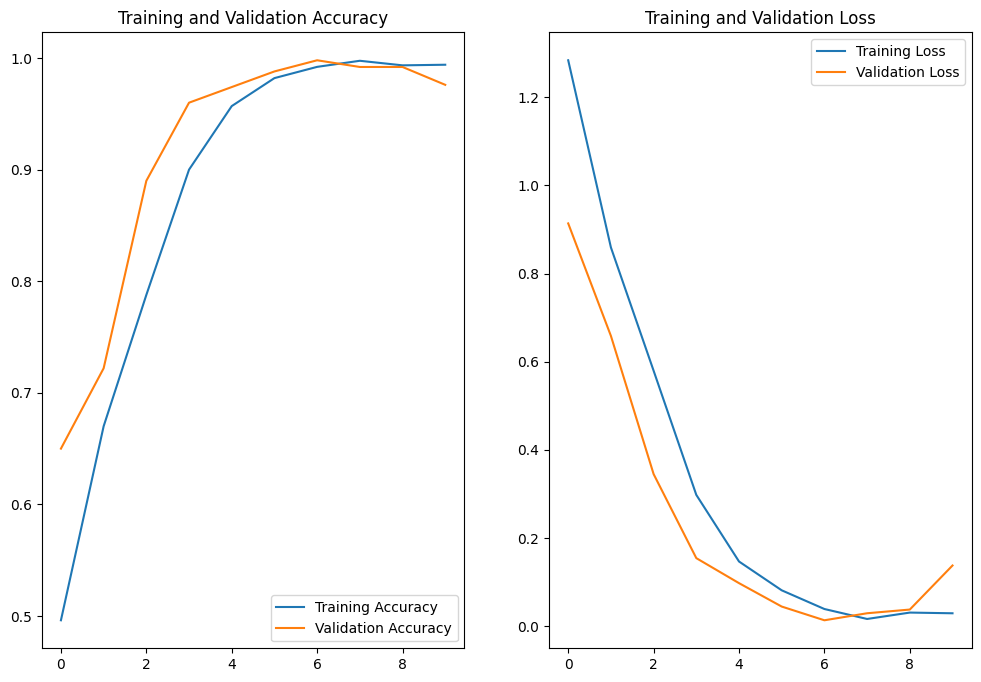

In [ ]:
# Visualizar las curvas de entrenamiento
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step


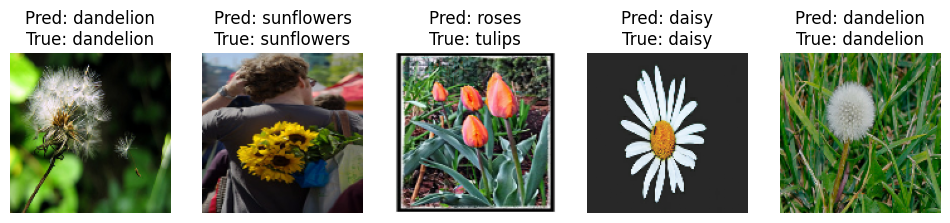

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función para mostrar imágenes con sus predicciones
def plot_images_with_predictions(dataset, model, class_names, num_images=5):
    plt.figure(figsize=(12, 12))
    for images, labels in dataset.take(1):  # Tomar un lote del dataset de prueba
        predictions = model.predict(images)  # Realizar predicciones sobre las imágenes
        predictions = np.argmax(predictions, axis=1)  # Obtener la clase predicha

        for i in range(num_images):
            plt.subplot(1, num_images, i+1)
            plt.imshow(images[i].numpy())
            plt.title(f'Pred: {class_names[predictions[i]]}\nTrue: {class_names[labels[i]]}')
            plt.axis('off')
    plt.show()

# Obtener los nombres de las clases del dataset
class_names = info.features['label'].names

# Probar el modelo visualizando predicciones
plot_images_with_predictions(test_dataset, model, class_names, num_images=5)
